In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybedtools as pb
from matplotlib.colors import LogNorm
import numpy as np
from scipy import stats
import pandas as pd
import pybedtools as pb
from scipy import stats
font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : '12'}

plt.rc('font', **font)

In [2]:
def dict_expression(edgeR_fname, FDR=True):
    dict_exp = {}
    
    with open(edgeR_fname, "r") as fo:
        for l in fo.read().splitlines():
            if l.split("\t")[0] != "gene_id":
                gene_name = l.split("\t")[1]
                fdr = float(l.split("\t")[-2])
                logF = float(l.split("\t")[2])
                if "," in gene_name:
                    for test in gene_name.split(","): 
                        if fdr < 0.05 or not FDR:
                            dict_exp.setdefault(test.upper(),logF) 
                    #print gene_name, fdr
                else:
                    if fdr < 0.05 or not FDR:
                        dict_exp.setdefault(gene_name.upper(),logF)


    return dict_exp

In [3]:
def find_genes_DE_inbed(bed_file, expr):
    for b in bed_file:
        if b.name.upper() in expr:
            yield b.name
            
def find_DE_inbed(bed_file, expr):
    for b in bed_file:
        if b.name.upper() in expr:
            yield expr[b.name.upper()]
            


**To do**:

All DE genes (KO vs WT, FDR<0.05) in brain

All DE genes (KO vs WT, FDR<0.05) in Nucleosome-5fC (nucleosome in 5fC peak f=0.9) in brain. The nuc-5fC should
be 90% within the enhancer. Bin Ren Lab enhancers 1500

All DE genes (KO vs WT, FDR<0.05) in heart

All DE genes (KO vs WT, FDR<0.05) in Nucleosome-5fC (nucleosome in 5fC peak f=0.9) in heart.  The nuc-5fC should
be 90% within the enhancer. Bin Ren Lab enhancers 1500


Common 5fC between tissues in KO, see if their genes are DE or not.

# TDG WT vs KO in Heart and Brain



In [56]:
expr_brain_ko_vs_wt = dict_expression("expr_diff.KO_vs_WT.edgeR.txt")
#expr_brain_ko_vs_wt = dict_expression("expr_diff.ko_vs_wt_brain.edgeR.txt")
expr_heart_ko_vs_wt = dict_expression("expr_diff.ko_vs_wt_heart.edgeR.txt")
expr_brain_vs_heart_ko = dict_expression("expr_diff.brain_vs_heart_ko.edgeR.txt")
expr_brain_vs_heart_wt = dict_expression("expr_diff.brain_vs_heart_wt.edgeR.txt")
# No FDR
all_expr_brain_ko_vs_wt = dict_expression("expr_diff.KO_vs_WT.edgeR.txt", FDR=False)
all_expr_heart_ko_vs_wt = dict_expression("expr_diff.ko_vs_wt_heart.edgeR.txt", FDR=False)
all_expr_brain_vs_heart_ko = dict_expression("expr_diff.brain_vs_heart_ko.edgeR.txt", FDR=False)
all_expr_brain_vs_heart_wt = dict_expression("expr_diff.brain_vs_heart_wt.edgeR.txt", FDR=False)

In [57]:
print("Number of DE genes Brain KO_vs_WT", len(expr_brain_ko_vs_wt))
print("Number of DE genes Heart KO_vs_WT", len(expr_heart_ko_vs_wt))
print("Number of DE genes Brain vs Heart WT", len(expr_brain_vs_heart_wt))
print("Number of DE genes Brain vs Heart KO", len(expr_brain_vs_heart_ko))
print()
print("Number of total genes Brain KO_vs_WT", len(all_expr_brain_ko_vs_wt))
print("Number of total genes Heart KO_vs_WT", len(all_expr_heart_ko_vs_wt))
print("Number of total genes Brain vs Heart WT", len(all_expr_brain_vs_heart_wt))
print("Number of total genes Brain vs Heart KO", len(all_expr_brain_vs_heart_ko))

Number of DE genes Brain KO_vs_WT 87
Number of DE genes Heart KO_vs_WT 188
Number of DE genes Brain vs Heart WT 4036
Number of DE genes Brain vs Heart KO 3100

Number of total genes Brain KO_vs_WT 14415
Number of total genes Heart KO_vs_WT 13286
Number of total genes Brain vs Heart WT 13286
Number of total genes Brain vs Heart KO 13286


# Number of DE genes for which we have enhancer annotation Brain/Heart

In [58]:
genes_enhancer_brain = np.genfromtxt("genes_in_enhancer_brain.txt", dtype="str")
genes_enhancer_heart = np.genfromtxt("genes_in_enhancer_heart.txt", dtype="str")

In [59]:
de_enhancer_brain_wt_ko = set()
for g in genes_enhancer_brain:
    if g.upper() in expr_brain_ko_vs_wt:
        de_enhancer_brain_wt_ko.add(expr_brain_ko_vs_wt[g.upper()])
de_enhancer_heart_wt_ko = set()
for g in genes_enhancer_heart:
    if g.upper() in expr_heart_ko_vs_wt:
        de_enhancer_heart_wt_ko.add(expr_heart_ko_vs_wt[g.upper()])

# All DE genes (KO vs WT, FDR<0.05) in Nucleosome-5fC (nucleosome in 5fC peak f=0.9)

So the doubt is... which 5fC and which nucleosome.... Consensus, unique to... 

In [60]:
# Built intersection. Start by reading in the bed files
# 5fC
cons_5fC_brain_wt = pb.BedTool("5fC_consensus_brain_WT.bed.gz")
cons_5fC_brain_ko = pb.BedTool("5fC_consensus_brain_ko.bed.gz")
cons_5fC_heart_wt = pb.BedTool("5fC_heart_consensus_WT.bed.gz")
cons_5fC_heart_ko = pb.BedTool("5fC_heart_consensus_KO.bed.gz")
# Nuc
cons_nuc_brain_ko = pb.BedTool("ConsensusNucleosome_iNPS_Brain_KO_noMT.bed")
cons_nuc_brain_wt = pb.BedTool("ConsensusNucleosome_iNPS_Brain_WT_noMT.bed")
cons_nuc_heart_wt = pb.BedTool("ConsensusNucleosome_iNPS_Heart_WT_noMT.bed")
cons_nuc_heart_ko = pb.BedTool("ConsensusNucleosome_iNPS_Heart_KO_noMT.bed")

In [61]:
# ko intersection, nucleosome in 5fC f=0.9
nuc_5fC_brain_ko = cons_nuc_brain_ko.intersect(cons_5fC_brain_ko, f=0.9)
nuc_5fC_heart_ko = cons_nuc_heart_ko.intersect(cons_5fC_heart_ko, f=0.9)
print("Brain  KO", len(nuc_5fC_brain_ko))
print("Heart KO", len(nuc_5fC_heart_ko))
nuc_5fC_brain_wt = cons_nuc_brain_wt.intersect(cons_5fC_brain_wt, f=0.9)
nuc_5fC_heart_wt = cons_nuc_heart_wt.intersect(cons_5fC_heart_wt, f=0.9)
print("Brain  WT", len(nuc_5fC_brain_wt))
print("Heart WT", len(nuc_5fC_heart_wt))

Brain  KO 54976
Heart KO 90346
Brain  WT 1977
Heart WT 543


In [145]:
# intersect with enhancers Ren Lab
enhancers_heart = pb.BedTool("mm9_enhancer_heart_slop_1500.bed")
enhancers_brain = pb.BedTool("mm9_enhancer_brain_slop_1500.bed")
#enhancers_heart = pb.BedTool("nochr_prestige_enhancers_mm9_embrio_heart.bed")
#enhancers_brain = pb.BedTool("nochr_prestige_enhancers_mm9_embrio_brain.bed")

In [146]:
#KO
enhancers_nuc5fc_h_ko = enhancers_heart.intersect(nuc_5fC_heart_ko)
enhancers_nuc5fc_b_ko = enhancers_brain.intersect(nuc_5fC_brain_ko)

enhancers_not_nuc5fc_h_ko = enhancers_heart.intersect(nuc_5fC_heart_ko, v=True)
enhancers_not_nuc5fc_b_ko = enhancers_brain.intersect(nuc_5fC_brain_ko, v=True)


# WT
enhancers_nuc5fc_h_wt = enhancers_heart.intersect(nuc_5fC_heart_wt)
enhancers_nuc5fc_b_wt = enhancers_brain.intersect(nuc_5fC_brain_wt)

enhancers_not_nuc5fc_h_wt = enhancers_heart.intersect(nuc_5fC_heart_wt, v=True)
enhancers_not_nuc5fc_b_wt = enhancers_brain.intersect(nuc_5fC_brain_wt, v=True)

# print
print("Brain nuc5fC WT", len(enhancers_nuc5fc_b_wt))
print("Brain nuc5fC KO", len(enhancers_nuc5fc_b_ko))
print("Brain NOT nuc5fC WT", len(enhancers_not_nuc5fc_b_wt))
print("Brain NOT nuc5fC KO", len(enhancers_not_nuc5fc_b_ko))

print()
print("Heart nuc5fC WT", len(enhancers_nuc5fc_h_wt))
print("Heart nuc5fC KO", len(enhancers_nuc5fc_h_ko))
print("Heart NOT nuc5fC WT", len(enhancers_not_nuc5fc_h_wt))
print("Heart NOT nuc5fC KO", len(enhancers_not_nuc5fc_h_ko))

Brain nuc5fC WT 593
Brain nuc5fC KO 11798
Brain NOT nuc5fC WT 35068
Brain NOT nuc5fC KO 26251

Heart nuc5fC WT 100
Heart nuc5fC KO 32449
Heart NOT nuc5fC WT 48084
Heart NOT nuc5fC KO 28944


In [147]:
# Heart
logfc_h_5fC_nuc_de = list((find_DE_inbed(enhancers_nuc5fc_h_ko, 
                                        expr_heart_ko_vs_wt)))
logfc_h_not_5fC_nuc_de = list((find_DE_inbed(enhancers_not_nuc5fc_h_ko, 
                                            expr_heart_ko_vs_wt)))
# Brain 
logfc_b_5fC_nuc_de = list((find_DE_inbed(enhancers_nuc5fc_b_ko, 
                                        expr_brain_ko_vs_wt)))
logfc_b_not_5fC_nuc_de = list((find_DE_inbed(enhancers_not_nuc5fc_b_ko, 
                                            expr_brain_ko_vs_wt)))

In [148]:
print("Brain DE 5fC-nuc", len(logfc_b_5fC_nuc_de))
print("Heart DE 5fC-nuc", len(logfc_h_5fC_nuc_de))

Brain DE 5fC-nuc 40
Heart DE 5fC-nuc 217


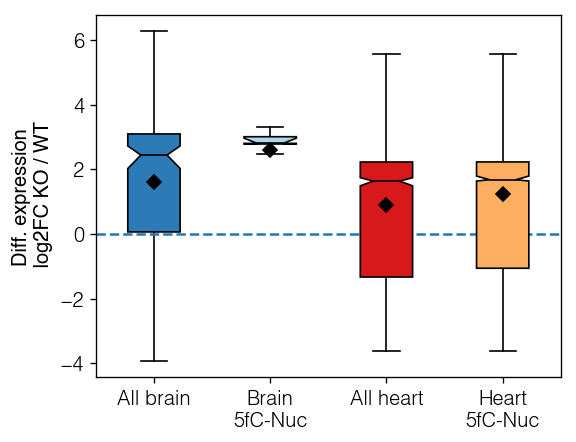

In [137]:
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='black')
f, ax = plt.subplots(1, 1, sharex=True,
                    figsize=(5,4), dpi=120)
_ = ax.boxplot([list(expr_brain_ko_vs_wt.values()), 
                    logfc_b_5fC_nuc_de, 
                    list(expr_heart_ko_vs_wt.values()), 
                    logfc_h_5fC_nuc_de], 
                medianprops=medianprops, 
               meanprops=meanpointprops,
                showmeans=True, notch=True,
               patch_artist=True, showfliers=False, 
               bootstrap=5000)
names = ["All brain", "Brain\n5fC-Nuc", "All heart", "Heart\n5fC-Nuc"]
colors = ['#2c7bb6', '#abd9e9',"#d7191c", "#fdae61"]
for patch, color in zip(_['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(names)
_ = ax.axhline(linestyle="--")
ax.set_ylabel("Diff. expression\n log2FC KO / WT")
plt.savefig("boxplot_DE_wt_ko_5fc.pdf", bbox_inches = 'tight')

In [138]:
_, pval = stats.mannwhitneyu(list(expr_brain_ko_vs_wt.values()), logfc_b_5fC_nuc_de )
print("pval brain", pval)
_, pval = stats.mannwhitneyu(list(expr_heart_ko_vs_wt.values()), logfc_h_5fC_nuc_de )
print("pval heart", pval)

pval brain 0.00343773369415
pval heart 0.0387260271595


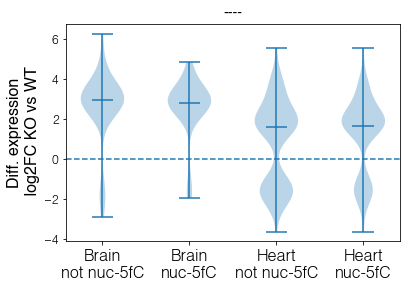

In [114]:
_ = plt.violinplot([logfc_b_not_5fC_nuc_de, 
                    logfc_b_5fC_nuc_de, 
                    logfc_h_not_5fC_nuc_de, 
                    logfc_h_5fC_nuc_de], 
                   showmedians=True, showmeans=False)
names = ["Brain\nnot nuc-5fC", "Brain\nnuc-5fC", "Heart\nnot nuc-5fC", "Heart\nnuc-5fC"]
_ = plt.axhline(linestyle="--")
plt.ylabel("Diff. expression\n log2FC KO vs WT", size=16)
plt.title("----")
_ = plt.xticks([1, 2, 3, 4], names, size=16)

In [89]:
_, pval = stats.mannwhitneyu(logfc_b_not_5fC_nuc_de, logfc_b_5fC_nuc_de)
print("Pval Brain DE NOT nuc-5fC vs Brain nuc-5fC", pval)
_, pval = stats.mannwhitneyu(list(expr_brain_ko_vs_wt.values()), logfc_b_5fC_nuc_de)
print("Pval Brain DE NOT nuc-5fC vs Brain nuc-5fC", pval)
_, pval = stats.mannwhitneyu(logfc_h_not_5fC_nuc_de, logfc_h_5fC_nuc_de)
print("Pval Heart DE NOT nuc-5fC vs Heart nuc-5fC", pval)

Pval Brain DE NOT nuc-5fC vs Brain nuc-5fC 0.151953008098
Pval Brain DE NOT nuc-5fC vs Brain nuc-5fC 0.00343773369415
Pval Heart DE NOT nuc-5fC vs Heart nuc-5fC 0.0427918130051


# Gene expression 

In [90]:
# Read it from the RNA_seq analysis where we processed everything together
ge = pd.read_table("rpkm_brain_heart_wt_and_ko.txt")

In [91]:
# Average the GE for each subclass
ge["Brain_KO"] = ge[["Brain_KO1","Brain_KO2", "Brain_KO3"]].mean(axis=1)
ge["Brain_WT"] = ge[["Brain_WT1","Brain_WT2", "Brain_WT3"]].mean(axis=1)
ge["Heart_KO"] = ge[["Heart_KO1","Heart_KO2", "Heart_KO3"]].mean(axis=1)
ge["Heart_WT"] = ge[["Heart_WT1","Heart_WT2", "Heart_WT3"]].mean(axis=1)

In [92]:
# Make a ge dictionary for each case
def do_dict_from_ge(pd_obj, col_name):
    dic = pd.Series(np.log(ge[col_name].values), index=ge["gene_name"].str.upper()).to_dict()
    #dic = pd.Series(ge[col_name].values, index=ge["gene_name"].str.upper()).to_dict()
    return dic

In [93]:
ge_dict = {}
for col in ["Brain_KO", "Brain_WT", "Heart_KO", "Heart_WT"]:
    ge_dict.setdefault(col, do_dict_from_ge(ge, col))

In [94]:
# Heart
ge_h_5fC_nuc_ko = list(find_DE_inbed(enhancers_nuc5fc_h_ko, ge_dict["Heart_KO"]))
ge_h_not_5fC_nuc_ko = list(find_DE_inbed(enhancers_not_nuc5fc_h_ko, ge_dict["Heart_KO"]))
ge_h_5fC_nuc_wt = list(find_DE_inbed(enhancers_nuc5fc_h_wt, ge_dict["Heart_WT"]))
ge_h_not_5fC_nuc_wt = list(find_DE_inbed(enhancers_not_nuc5fc_h_wt, ge_dict["Heart_WT"]))
print("N heart 5fC-Nuc KO", len(ge_h_5fC_nuc_ko))
print("N heart not 5fC-Nuc KO", len(ge_h_not_5fC_nuc_ko))
print("N heart 5fC-Nuc WT", len(ge_h_5fC_nuc_wt))
print("N heart not 5fC-Nuc WT", len(ge_h_not_5fC_nuc_wt))

N heart 5fC-Nuc KO 26078
N heart not 5fC-Nuc KO 22577
N heart 5fC-Nuc WT 78
N heart not 5fC-Nuc WT 37943


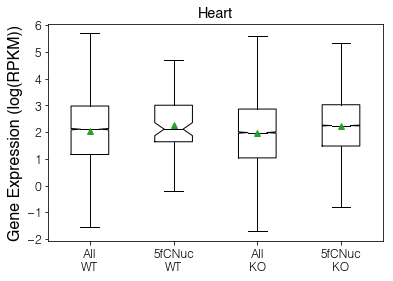

In [105]:
medianprops = dict(color='black')
_ = plt.boxplot([list(ge_dict["Heart_WT"].values()),

                 ge_h_5fC_nuc_wt, 
                 list(ge_dict["Heart_KO"].values()),
 
                 ge_h_5fC_nuc_ko], 
                medianprops=medianprops,
                showfliers=False, notch=True, showmeans=True)
names = ["All\nWT", "5fCNuc\nWT", "All\nKO", "5fCNuc\nKO"]

plt.ylabel("Gene Expression (log(RPKM))", size=16)
plt.title("Heart")
_ = plt.xticks([1, 2, 3, 4], names, size=12)

plt.show()

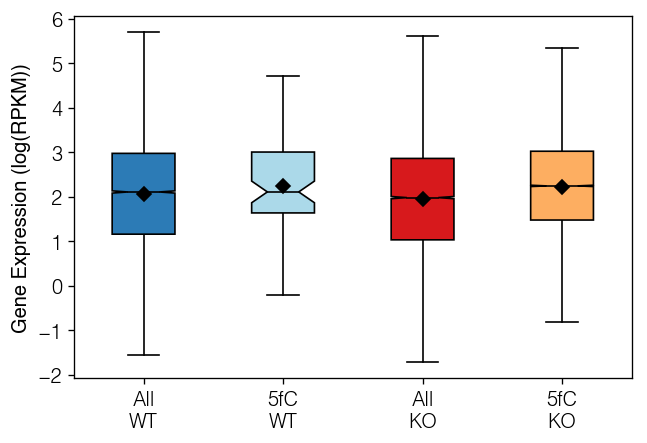

In [129]:

medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='black')
f, ax = plt.subplots(1, 1, sharex=True,
                    figsize=(6,4), dpi=120)
_ = ax.boxplot([list(ge_dict["Heart_WT"].values()),
                 ge_h_5fC_nuc_wt, 
                 list(ge_dict["Heart_KO"].values()),
                 ge_h_5fC_nuc_ko], 
               medianprops=medianprops,
               meanprops=meanpointprops, patch_artist=True, 
                showfliers=False, notch=True, showmeans=True)
names = ["All\nWT", "5fC\nWT", "All\nKO", "5fC\nKO"]
ax.set_ylabel("Gene Expression (log(RPKM))")
colors = ['#2c7bb6', '#abd9e9',"#d7191c", "#fdae61"]
for patch, color in zip(_['boxes'], colors):
    patch.set_facecolor(color)
#ax.set_title("Heart")
ax.set_xticklabels(names)
plt.savefig("boxplot_heart_log_gene_expression_wt_ko_5fc.pdf")

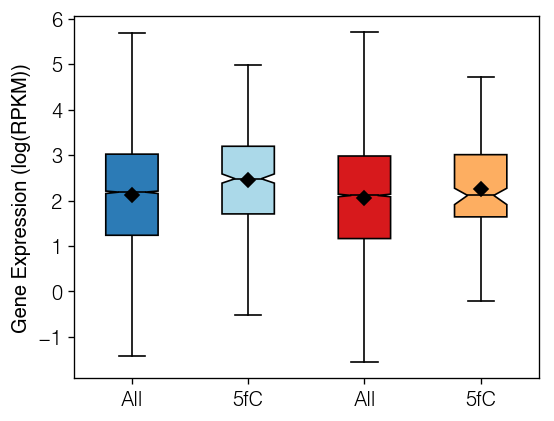

In [139]:
# Combine for WT
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='black')
f, ax = plt.subplots(1, 1, sharex=True,
                    figsize=(5,4), dpi=120)
_ = ax.boxplot([list(ge_dict["Brain_WT"].values()),
                 ge_b_5fC_nuc_wt, 
                 list(ge_dict["Heart_WT"].values()),
                 ge_h_5fC_nuc_wt], 
                 medianprops=medianprops,
               meanprops=meanpointprops,
               patch_artist=True,
                showfliers=False, notch=True, showmeans=True, 
              bootstrap=5000)
names = ["All", "5fC", "All", "5fC"]
colors = ['#2c7bb6', '#abd9e9',"#d7191c", "#fdae61"]
for patch, color in zip(_['boxes'], colors):
    patch.set_facecolor(color)
ax.set_ylabel("Gene Expression (log(RPKM))")
#ax.set_title("Heart")
ax.set_xticklabels(names)
plt.savefig("boxplot_brain_heart_log_gene_expression_wt_5fc.pdf", bbox_inches = 'tight')


In [142]:
_, pval = stats.mannwhitneyu(list(ge_dict["Brain_WT"].values()), ge_b_5fC_nuc_wt )
print("pval brain", pval)
_, pval = stats.mannwhitneyu(list(ge_dict["Heart_WT"].values()), ge_h_5fC_nuc_wt )
print("pval heart", pval)


pval brain 2.26164568416e-08
pval heart 0.200826627416


In [48]:
# Brain
ge_b_5fC_nuc_ko = list(find_DE_inbed(enhancers_nuc5fc_b_ko, ge_dict["Brain_KO"]))
ge_b_not_5fC_nuc_ko = list(find_DE_inbed(enhancers_not_nuc5fc_b_ko, ge_dict["Brain_KO"]))
ge_b_5fC_nuc_wt = list(find_DE_inbed(enhancers_nuc5fc_b_wt, ge_dict["Brain_WT"]))
ge_b_not_5fC_nuc_wt = list(find_DE_inbed(enhancers_not_nuc5fc_b_wt, ge_dict["Brain_WT"]))

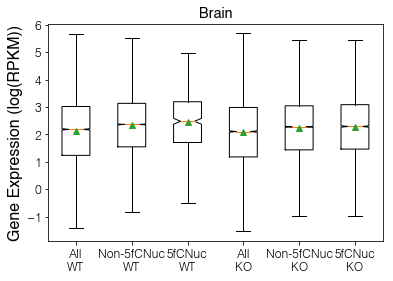

In [49]:
_ = plt.boxplot([list(ge_dict["Brain_WT"].values()),
                ge_b_not_5fC_nuc_wt, 
                 ge_b_5fC_nuc_wt,
                 list(ge_dict["Brain_KO"].values()),
                 ge_b_not_5fC_nuc_ko, 
                 ge_b_5fC_nuc_ko],
                showfliers=False,
                notch=True,
                showmeans=True,
                )
names = ["All\nWT","Non-5fCNuc\nWT", "5fCNuc\nWT", "All\nKO", "Non-5fCNuc\nKO", "5fCNuc\nKO"]

plt.ylabel("Gene Expression (log(RPKM))", size=16)
plt.title("Brain")
_ = plt.xticks([1, 2, 3, 4, 5, 6], names, size=12)

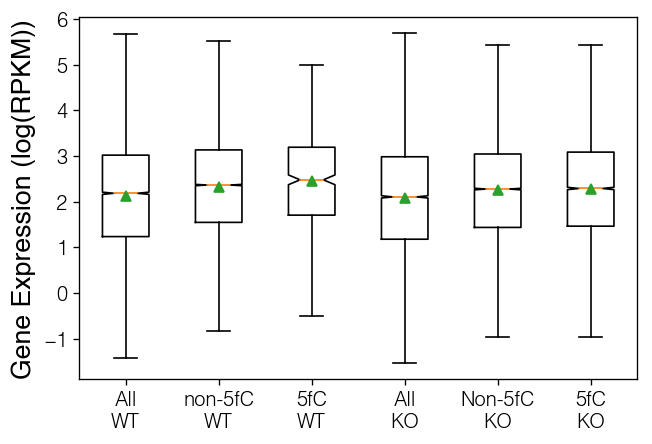

In [50]:
f, ax = plt.subplots(1, 1, sharex=True,
                    figsize=(6,4), dpi=120)
_ = ax.boxplot([list(ge_dict["Brain_WT"].values()),
                ge_b_not_5fC_nuc_wt, 
                 ge_b_5fC_nuc_wt,
                 list(ge_dict["Brain_KO"].values()),
                 ge_b_not_5fC_nuc_ko, 
                 ge_b_5fC_nuc_ko],
                showfliers=False,
                notch=True,
                showmeans=True,
                )

names = ["All\nWT","non-5fC\nWT", "5fC\nWT", "All\nKO", "Non-5fC\nKO", "5fC\nKO"]
ax.set_ylabel("Gene Expression (log(RPKM))", size=16)
#ax.set_title("Brain")
ax.set_xticklabels(names)
plt.savefig("boxplot_brain_log_gene_expression_wt_ko_5fc.pdf")


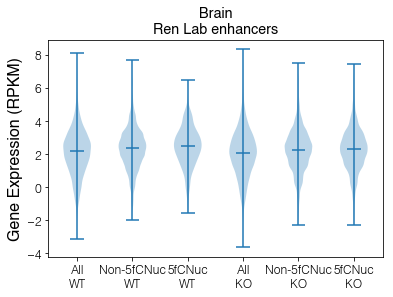

In [51]:
_ = plt.violinplot([list(ge_dict["Brain_WT"].values()),
                ge_b_not_5fC_nuc_wt, 
                 ge_b_5fC_nuc_wt,
                 list(ge_dict["Brain_KO"].values()),
                 ge_b_not_5fC_nuc_ko, 
                 ge_b_5fC_nuc_ko],
                showmedians=True,
                )
names = ["All\nWT","Non-5fCNuc\nWT", "5fCNuc\nWT", "All\nKO", "Non-5fCNuc\nKO", "5fCNuc\nKO"]

plt.ylabel("Gene Expression (RPKM)", size=16)
plt.title("Brain\nRen Lab enhancers")
_ = plt.xticks([1, 2, 3, 4, 5, 6], names, size=12)

In [37]:
_, pval = stats.mannwhitneyu(list(ge_dict["Brain_WT"].values()), ge_b_5fC_nuc_wt )
print("Brain WT", pval)
_, pval = stats.mannwhitneyu(ge_b_not_5fC_nuc_wt, ge_b_5fC_nuc_wt )
print("not5fCnuc Brain", pval)
_, pval = stats.mannwhitneyu(list(ge_dict["Brain_KO"].values()), ge_b_5fC_nuc_ko )
print("Brain KO vs b 5fC nuc KO", pval)
_, pval = stats.mannwhitneyu(list(ge_dict["Brain_KO"].values()), ge_b_not_5fC_nuc_ko )
print("Brain KO vs b not5fC nuc KO", pval)

Brain WT 2.26164568416e-08
not5fCnuc Brain 0.0108016724724
Brain KO vs b 5fC nuc KO 1.31714582971e-27
Brain KO vs b not5fC nuc KO 1.9663656876e-30


In [150]:
expr_heart_ko_vs_wt["VEGFA"]

2.19939807588309